In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from glob import glob
import os


In [14]:
base_log = 6
level = 6
#keys = "80_1024_1_5_3"
data = "CGM_p77_24h"
padd = 4
prec = 3
high = 400

keys = "80_1024_1_%d_%d"%(base_log,level)

for padd in [2,3,4]:
    script = "target/debug/encode_data %s %s %d %d %d"%(keys, data, padd, prec, high)
    !$script


assume: encode 80_1024_1_6_6 CGM_p77_24h 2 3 400
write to: data/80_1024_1_6_6/CGM_p77_24h_2_3_400.enc
assume: encode 80_1024_1_6_6 CGM_p77_24h 3 3 400
write to: data/80_1024_1_6_6/CGM_p77_24h_3_3_400.enc
assume: encode 80_1024_1_6_6 CGM_p77_24h 4 3 400
write to: data/80_1024_1_6_6/CGM_p77_24h_4_3_400.enc


In [29]:
!ls data/*/*.enc

data/80_1024_1_4_6/CGM_p77_24h_2_3_400.enc
data/80_1024_1_4_6/CGM_p77_24h_3_3_400.enc
data/80_1024_1_4_6/CGM_p77_24h_4_3_400.enc
data/80_1024_1_5_3/CGM_p77_24h_2_3_400_cgm_hourly.enc
data/80_1024_1_5_3/CGM_p77_24h_2_3_400.enc
data/80_1024_1_5_3/CGM_p77_24h_2_3_400_rolling_8.enc
data/80_1024_1_5_5/CGM_p77_24h_2_3_400.enc
data/80_1024_1_5_5/CGM_p77_24h_3_3_400.enc
data/80_1024_1_5_5/CGM_p77_24h_4_3_400.enc
data/80_1024_1_6_4/CGM_p77_24h_2_3_400_cgm_hourly.enc
data/80_1024_1_6_4/CGM_p77_24h_2_3_400.enc
data/80_1024_1_6_4/CGM_p77_24h_2_3_400_H70.enc
data/80_1024_1_6_4/CGM_p77_24h_2_3_400_rolling_8.enc
data/80_1024_1_6_4/CGM_p77_24h_2_3_400_TIR.enc
data/80_1024_1_6_4/CGM_p77_24h_3_3_400.enc
data/80_1024_1_6_4/CGM_p77_24h_4_3_400.enc
data/80_1024_1_6_6/CGM_p77_24h_2_3_400.enc
data/80_1024_1_6_6/CGM_p77_24h_3_3_400.enc
data/80_1024_1_6_6/CGM_p77_24h_4_3_400.enc


In [30]:
!ls data/*/*.csv

data/80_1024_1_4_6/CGM_p77_24h_2_3_400.csv
data/80_1024_1_4_6/CGM_p77_24h_3_3_400.csv
data/80_1024_1_4_6/CGM_p77_24h_4_3_400.csv
data/80_1024_1_5_5/CGM_p77_24h_3_3_400.csv
data/80_1024_1_6_4/CGM_p77_24h_2_3_400.csv


In [32]:
allfiles = glob("data/*/*.enc")
for filepath in allfiles:
    _, keys, filename = filepath.split("/")
    name, _ = filename.split(".")
    file = "data/%s/%s.csv"%(keys,name)
    print(keys, name, os.path.isfile(file))
    if not os.path.isfile(file):
        script = "target/debug/decode_data %s %s"%(keys, name)
        #print("", script)
        !$script
        

80_1024_1_4_6 CGM_p77_24h_3_3_400 True
80_1024_1_4_6 CGM_p77_24h_4_3_400 True
80_1024_1_4_6 CGM_p77_24h_2_3_400 True
80_1024_1_5_5 CGM_p77_24h_3_3_400 True
80_1024_1_5_5 CGM_p77_24h_4_3_400 True
80_1024_1_5_5 CGM_p77_24h_2_3_400 True
80_1024_1_6_6 CGM_p77_24h_3_3_400 True
80_1024_1_6_6 CGM_p77_24h_4_3_400 True
80_1024_1_6_6 CGM_p77_24h_2_3_400 True
80_1024_1_5_3 CGM_p77_24h_2_3_400_cgm_hourly True
80_1024_1_5_3 CGM_p77_24h_2_3_400 True
80_1024_1_5_3 CGM_p77_24h_2_3_400_rolling_8 True
80_1024_1_6_4 CGM_p77_24h_3_3_400 True
80_1024_1_6_4 CGM_p77_24h_4_3_400 True
80_1024_1_6_4 CGM_p77_24h_2_3_400_cgm_hourly True
80_1024_1_6_4 CGM_p77_24h_2_3_400 True
80_1024_1_6_4 CGM_p77_24h_2_3_400_TIR True
80_1024_1_6_4 CGM_p77_24h_2_3_400_rolling_8 True
80_1024_1_6_4 CGM_p77_24h_2_3_400_H70 True


## score functions

In [100]:
data = "CGM_p77_24h"

df = pd.read_csv("data/%s.csv"%data, header=None, names=["ts","CGM"])
df["TIR"] = df["CGM"].apply(lambda x: 100.0 if ((x<180) & (x>70)) else 0.0)
df["H70"] = df["CGM"].apply(lambda x: 100.0 if (x<70) else 0.0)
df["H54"] = df["CGM"].apply(lambda x: 100.0 if (x<54) else 0.0)
df.head()


,ts,CGM,TIR,H70,H54
0,2021-01-01 12:18:40,189.000000,0.0,0.0,0.0
1,2021-01-01 12:23:40,194.993355,0.0,0.0,0.0
2,2021-01-01 12:28:40,193.000000,0.0,0.0,0.0
3,2021-01-01 12:33:40,198.980000,0.0,0.0,0.0
4,2021-01-01 12:38:40,193.006667,0.0,0.0,0.0


In [107]:
allfiles = glob("data/*/%s*.csv"%data)

dt = {"CGM": {}, "TIR":{}, "H70":{}, "H54":{}, "GVP":{}}

for filepath in allfiles:
    _, keys, filename = filepath.split("/")
    name, _ = filename.split(".")
    tmp = name.split("_")
    tag = keys+"_"+"_".join(tmp[3:6])
    if len(tmp) == 6:
        print(tag)
        ds = pd.read_csv(filepath, header=None)
        dt["CGM"][tag] = ds.values[:,0]
    elif len(tmp) == 7:
        print(tag)
        ds = pd.read_csv(filepath, header=None)
        dt[tmp[-1]][tag] = ds.values[:,0]
        

80_1024_1_4_6_2_3_400
80_1024_1_4_6_3_3_400
80_1024_1_4_6_4_3_400
80_1024_1_5_5_2_3_400
80_1024_1_5_5_3_3_400
80_1024_1_5_5_4_3_400
80_1024_1_6_6_2_3_400
80_1024_1_6_6_3_3_400
80_1024_1_6_6_4_3_400
80_1024_1_5_3_2_3_400
80_1024_1_6_4_2_3_400
80_1024_1_6_4_3_3_400
80_1024_1_6_4_2_3_400
80_1024_1_6_4_2_3_400
80_1024_1_6_4_4_3_400


In [108]:
tmp = pd.concat([
    (pd.DataFrame(dt[idx], index=df.index) - df[[idx]].values).describe().T[["std"]].rename(columns={'std': idx})
          for idx in ["CGM","TIR","H70"] ])
tmp

,CGM,TIR,H70
80_1024_1_4_6_2_3_400,1.744310e-09,NaN,NaN
80_1024_1_4_6_3_3_400,3.093502e-09,NaN,NaN
80_1024_1_4_6_4_3_400,6.789277e-09,NaN,NaN
80_1024_1_5_5_2_3_400,1.618365e-09,NaN,NaN
80_1024_1_5_5_3_3_400,3.473092e-09,NaN,NaN
80_1024_1_5_5_4_3_400,6.542331e-09,NaN,NaN
80_1024_1_6_6_2_3_400,1.724071e-09,NaN,NaN
80_1024_1_6_6_3_3_400,3.179454e-09,NaN,NaN
80_1024_1_6_6_4_3_400,6.860771e-09,NaN,NaN
80_1024_1_5_3_2_3_400,1.581607e-09,NaN,NaN


(                       count      mean       std    min       25%  50%  75%  \
 80_1024_1_6_4_2_3_400  288.0 -0.347407  5.892546 -100.0 -0.000586  0.0  0.0   
 
                             max  
 80_1024_1_6_4_2_3_400  0.009028  ,
      80_1024_1_6_4_2_3_400    TIR
 0                 0.001502    0.0
 1                 0.003536    0.0
 2                 0.002884    0.0
 3                 0.000000    0.0
 4                 0.000000    0.0
 ..                     ...    ...
 283             100.000000  100.0
 284             100.000000  100.0
 285              99.997739  100.0
 286             100.000000  100.0
 287              99.997068  100.0
 
 [288 rows x 2 columns])

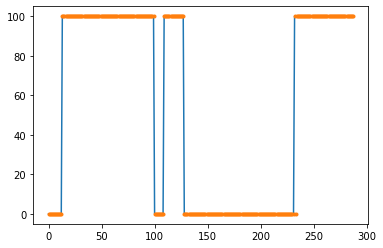

In [123]:
idx = "TIR"
ds = pd.DataFrame(dt[idx], index=df.index)
plt.plot(df[idx])
plt.plot(ds, ".")
(ds - df[[idx]].values).describe().T, pd.concat([ds,df[idx]], axis =1)


(                       count      mean       std  min  25%       50%  \
 80_1024_1_6_4_2_3_400  288.0  0.001666  0.002323  0.0  0.0  0.000399   
 
                             75%       max  
 80_1024_1_6_4_2_3_400  0.002879  0.011141  ,
      80_1024_1_6_4_2_3_400  H70
 0                 0.003780  0.0
 1                 0.001225  0.0
 2                 0.000000  0.0
 3                 0.000000  0.0
 4                 0.000945  0.0
 ..                     ...  ...
 283               0.004952  0.0
 284               0.000000  0.0
 285               0.004651  0.0
 286               0.001902  0.0
 287               0.000000  0.0
 
 [288 rows x 2 columns])

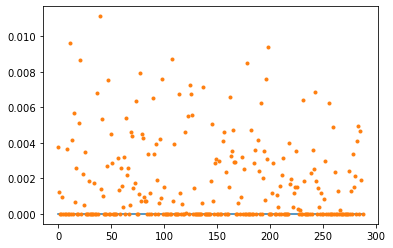

In [124]:
idx = "H70"
ds = pd.DataFrame(dt[idx], index=df.index)
plt.plot(df[idx])
plt.plot(ds, ".")
(ds - df[[idx]].values).describe().T, pd.concat([ds,df[idx]], axis =1)


## hourly averages

In [144]:
dfh = df.groupby(df.index//12).mean()


In [142]:
allfiles = glob("data/*/*.enc")
for filepath in allfiles:
    _, keys, filename = filepath.split("/")
    name, _ = filename.split(".")
    temp = name.split("_")
    file = "data/%s/%s_CGM_hourly.enc"%(keys,name)
    #print(keys, name, len(temp) == 6, os.path.isfile(file))
    if len(temp) == 6 and not os.path.isfile(file):
        script = "target/debug/calc_hourly %s %s"%(keys, name)
        print("", script)
        #!$script


 target/debug/calc_hourly 80_1024_1_4_6 CGM_p77_24h_3_3_400
 target/debug/calc_hourly 80_1024_1_4_6 CGM_p77_24h_4_3_400
 target/debug/calc_hourly 80_1024_1_4_6 CGM_p77_24h_2_3_400
 target/debug/calc_hourly 80_1024_1_5_5 CGM_p77_24h_3_3_400
 target/debug/calc_hourly 80_1024_1_5_5 CGM_p77_24h_4_3_400
 target/debug/calc_hourly 80_1024_1_5_5 CGM_p77_24h_2_3_400
 target/debug/calc_hourly 80_1024_1_6_6 CGM_p77_24h_3_3_400
 target/debug/calc_hourly 80_1024_1_6_6 CGM_p77_24h_4_3_400
 target/debug/calc_hourly 80_1024_1_6_6 CGM_p77_24h_2_3_400
 target/debug/calc_hourly 80_1024_1_6_4 CGM_p77_24h_3_3_400
 target/debug/calc_hourly 80_1024_1_6_4 CGM_p77_24h_4_3_400


In [145]:
allfiles = glob("data/*/%s*hourly.csv"%data)

dth = {"CGM": {}, "TIR":{}, "H70":{}, "H54":{}, "GVP":{}}

for filepath in allfiles:
    _, keys, filename = filepath.split("/")
    name, _ = filename.split(".")
    tmp = name.split("_")
    idx = tmp[-2]
    tag = keys+"_"+"_".join(tmp[3:6])
    print(tag, idx)
    dth[idx][tag] = pd.read_csv(filepath, header=None).values[:,0]
        

80_1024_1_5_3_2_3_400 CGM
80_1024_1_6_4_2_3_400 CGM


In [147]:
tmp = pd.concat([
    (pd.DataFrame(dth[idx], index=dfh.index) - dfh[[idx]].values)
        .describe().T[["std"]].rename(columns={'std': idx})
          for idx in ["CGM","TIR","H70"][:1] ])
tmp


,CGM
80_1024_1_5_3_2_3_400,12.411524
80_1024_1_6_4_2_3_400,5.390042


(                       count      mean        std        min       25%  \
 80_1024_1_5_3_2_3_400   24.0  2.454011  12.411524 -28.614578 -3.030488   
 80_1024_1_6_4_2_3_400   24.0  0.255472   5.390042  -9.588433 -4.289523   
 
                             50%        75%        max  
 80_1024_1_5_3_2_3_400  2.932588  13.376880  20.352843  
 80_1024_1_6_4_2_3_400 -0.938800   4.722811   9.346733  ,
     80_1024_1_5_3_2_3_400  80_1024_1_6_4_2_3_400         CGM
 0              190.154681             194.878432  193.328335
 1              176.482833             152.566567  162.155000
 2              148.461442             142.870604  135.325556
 3              108.362507              99.482509  103.670278
 4              125.151511             113.264525  118.991944
 5               98.317841              80.623287   85.665275
 6               86.615128              84.695725   86.410000
 7               97.321419              88.769103   93.363889
 8              205.915236             195.

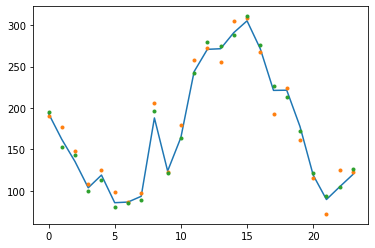

In [148]:
idx = "CGM"
dsh = pd.DataFrame(dth[idx], index=dfh.index)
plt.plot(dfh[idx])
plt.plot(dsh, ".")
(dsh - dfh[[idx]].values).describe().T, pd.concat([dsh,dfh[idx]], axis =1)


In [16]:
!tail hourly_stats.txt

data/80_1024_1_6_4/CGM_p77_24h_2_3_400_cgm_hourly.enc 85929
data/80_1024_1_6_4/CGM_p77_24h_2_3_400_cgm_hourly.enc 85919
data/80_1024_1_6_4/CGM_p77_24h_2_3_400_cgm_hourly.enc 85546
data/80_1024_1_6_4/CGM_p77_24h_2_3_400_cgm_hourly.enc 91505
data/80_1024_1_6_4/CGM_p77_24h_2_3_400_cgm_hourly.enc 91653
data/80_1024_1_6_4/CGM_p77_24h_2_3_400_cgm_hourly.enc 88415
data/80_1024_1_6_4/CGM_p77_24h_2_3_400_cgm_hourly.enc 86252
data/80_1024_1_6_4/CGM_p77_24h_2_3_400_cgm_hourly.enc 85805
data/80_1024_1_6_4/CGM_p77_24h_2_3_400_cgm_hourly.enc 86084
data/80_1024_1_6_4/CGM_p77_24h_2_3_400_cgm_hourly.enc 85991


In [17]:
!tail rolling_stats.txt

80_1024_1_6_4 CGM_p77_24h_2_3_400 8 46 11098 145 145
80_1024_1_6_4 CGM_p77_24h_2_3_400 8 47 10990 148 148
80_1024_1_6_4 CGM_p77_24h_2_3_400 8 48 11104 151 151
80_1024_1_6_4 CGM_p77_24h_2_3_400 8 49 11123 154 154
80_1024_1_6_4 CGM_p77_24h_2_3_400 8 50 11074 157 157
80_1024_1_6_4 CGM_p77_24h_2_3_400 8 51 11028 160 160
80_1024_1_6_4 CGM_p77_24h_2_3_400 8 52 11265 163 163
80_1024_1_6_4 CGM_p77_24h_2_3_400 8 53 11281 166 166
80_1024_1_6_4 CGM_p77_24h_2_3_400 8 54 11310 169 169
80_1024_1_6_4 CGM_p77_24h_2_3_400 8 55 11239 172 172
